# Proyek Analisis Data: Analisis Data E-commerce
- Nama: Taupik Adriansyah Saputra
- Email: trz7one@proton.me
- Id Dicoding: 3290908

## Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berubah sepanjang waktu? 
- Pada jam berapakah, org org lebih suka bersepeda?
- bagaimana pengaruh musim bekerja pada tren?
- Apakah ada pola musiman atau tren jangka panjang?


## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load data day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


load data hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Menilai DataFrame Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi df day: ", day_df.duplicated().sum())

Jumlah duplikasi df day:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- disini kita melihat max season ada 4, jadi ada musim panas, hujan , dingin, dan semi
- month = 12 bulan

- Menilai DataFrame Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi df hour: ", hour_df.duplicated().sum())

Jumlah duplikasi df hour:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- karena pada data sudah bersih , jadi tahap ini kosong

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [13]:
day_df.groupby(by="mnth").agg({
    "dteday": "nunique",
    "season": ["max", "min", "mean", "std"]
})

dteday season                        
     nunique    max min      mean       std
mnth                                       
1         62      1   1  1.000000  0.000000
2         57      1   1  1.000000  0.000000
3         62      2   1  1.354839  0.482370
4         60      2   2  2.000000  0.000000
5         62      2   2  2.000000  0.000000
6         60      3   2  2.333333  0.475383
7         62      3   3  3.000000  0.000000
8         62      3   3  3.000000  0.000000
9         60      4   3  3.266667  0.445948
10        62      4   4  4.000000  0.000000
11        60      4   4  4.000000  0.000000
12        62      4   1  2.935484  1.447111

In [14]:
day_df.groupby(by="mnth").agg({
    "dteday": "nunique",
    "season": ["max", "min", "mean", "std"],
    "holiday": ["max", "min", "mean", "std"],
    "weekday": ["max", "min", "mean", "std"],
    "workingday": ["max", "min", "mean", "std"]
})
			

dteday season                         holiday                          \
     nunique    max min      mean       std     max min      mean       std   
mnth                                                                          
1         62      1   1  1.000000  0.000000       1   0  0.048387  0.216335   
2         57      1   1  1.000000  0.000000       1   0  0.035088  0.185637   
3         62      2   1  1.354839  0.482370       0   0  0.000000  0.000000   
4         60      2   2  2.000000  0.000000       1   0  0.033333  0.181020   
5         62      2   2  2.000000  0.000000       1   0  0.032258  0.178127   
6         60      3   2  2.333333  0.475383       0   0  0.000000  0.000000   
7         62      3   3  3.000000  0.000000       1   0  0.032258  0.178127   
8         62      3   3  3.000000  0.000000       0   0  0.000000  0.000000   
9         60      4   3  3.266667  0.445948       1   0  0.033333  0.181020   
10        62      4   4  4.000000  0.000000       1   0  0.032258  0.178127   
11        60      4   4  4.000000  0.000000       1   0  0.066667  0.251549   
12        62      4   1  2.935484  1.447111       1   0  0.032258  0.178127   

     weekday                         workingday                          
         max min      mean       std        max min      mean       std  
mnth                                                                     
1          6   0  2.870968  2.060430          1   0  0.645161  0.482370  
2          6   0  3.000000  2.000000          1   0  0.684211  0.468961  
3          6   0  3.096774  1.981138          1   0  0.725806  0.449749  
4          6   0  3.000000  2.058467          1   0  0.666667  0.475383  
5          6   0  2.903226  1.981138          1   0  0.693548  0.464783  
6          6   0  3.100000  2.005923          1   0  0.716667  0.454420  
7          6   0  2.935484  2.063508          1   0  0.661290  0.477134  
8          6   0  3.000000  1.958588          1   0  0.741935  0.441142  
9          6   0  3.050000  2.045458          1   0  0.666667  0.475383  
10         6   0  2.919355  2.026856          1   0  0.677419  0.471280  
11         6   0  3.033333  1.974126          1   0  0.666667  0.475383  
12         6   0  3.064516  2.063508          1   0  0.661290  0.477134

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [16]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

Text(0, 0.5, 'Jumlah Peminjaman')

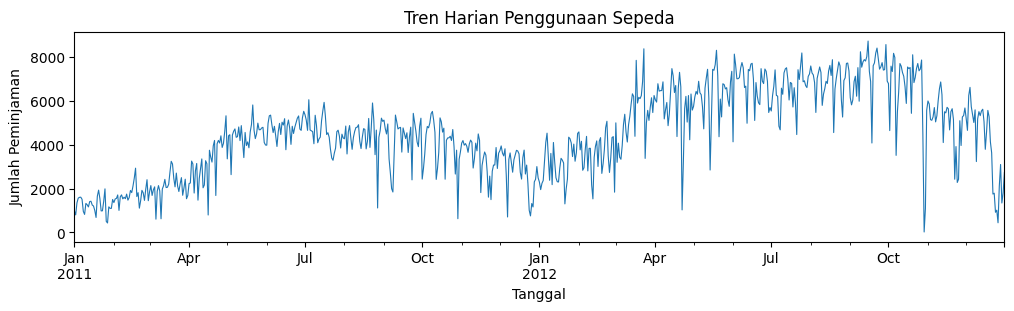

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
daily_counts = day_df.groupby('dteday')['cnt'].sum()
daily_counts.plot(linewidth=0.8)
plt.title('Tren Harian Penggunaan Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')

Text(0, 0.5, 'Jumlah Peminjaman')

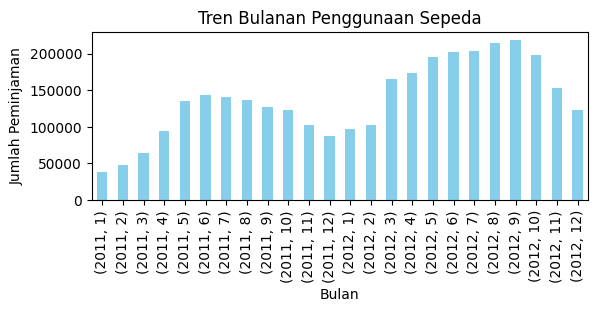

In [18]:
plt.subplot(2, 1, 2)
monthly_counts = day_df.groupby(['year', 'month'])['cnt'].sum()
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Tren Bulanan Penggunaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')

- pertanyaan ke 2

In [19]:
day_df.groupby(by="mnth").agg({
    "season": ["min", "max"],
    "registered":  ["min", "max"]
})

season     registered      
        min max        min   max
mnth                            
1         1   1        416  4185
2         1   1        905  4546
3         1   2        491  5893
4         2   2        674  5950
5         2   2       2213  6433
6         2   3       2993  6456
7         3   3       2298  6790
8         3   3        889  6541
9         3   4       1689  6946
10        4   4         20  6911
11        4   4        935  5520
12        1   4        432  6055

In [20]:
# Mapping musim ke dalam kategori
season_mapping = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
day_df['season_label'] = day_df['season'].map(season_mapping)

Musim dengan Peminjaman Sepeda Tertinggi: Musim Panas
Musim dengan Peminjaman Sepeda Terendah: Musim Dingin


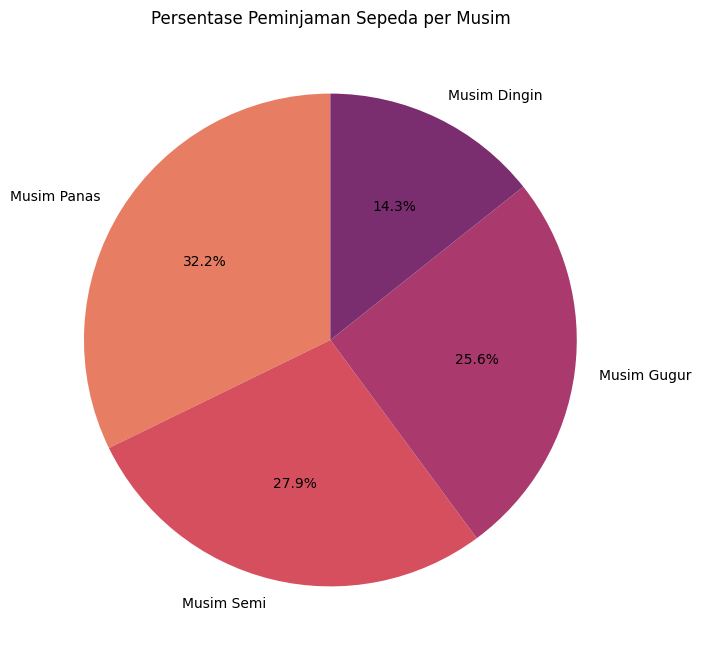

In [21]:
# Menghitung total peminjaman sepeda untuk setiap musim
total_counts_per_season = day_df.groupby('season_label')['cnt'].sum().sort_values(ascending=False)

# Menampilkan musim dengan total peminjaman tertinggi dan terendah
most_used_season = total_counts_per_season.idxmax()
least_used_season = total_counts_per_season.idxmin()

print(f"Musim dengan Peminjaman Sepeda Tertinggi: {most_used_season}")
print(f"Musim dengan Peminjaman Sepeda Terendah: {least_used_season}")

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(total_counts_per_season, labels=total_counts_per_season.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('flare', len(total_counts_per_season)))
plt.title('Persentase Peminjaman Sepeda per Musim')
plt.show()

Eksplore dataset hours

In [22]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### hour max nya ada 24 menandakan 1 hari full
kira kira pada jam berapakah, org org lebih suka bersepeda?

In [23]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

dari info di atas kita mengetahui bahwa jam yg paling banyak bersepeda, ialah pada jam 17,
jadi selama 2011 - 2012 , kebanyakan org daftar pd jam tsb.

Jam dengan Peminjaman Sepeda Tertinggi: 17


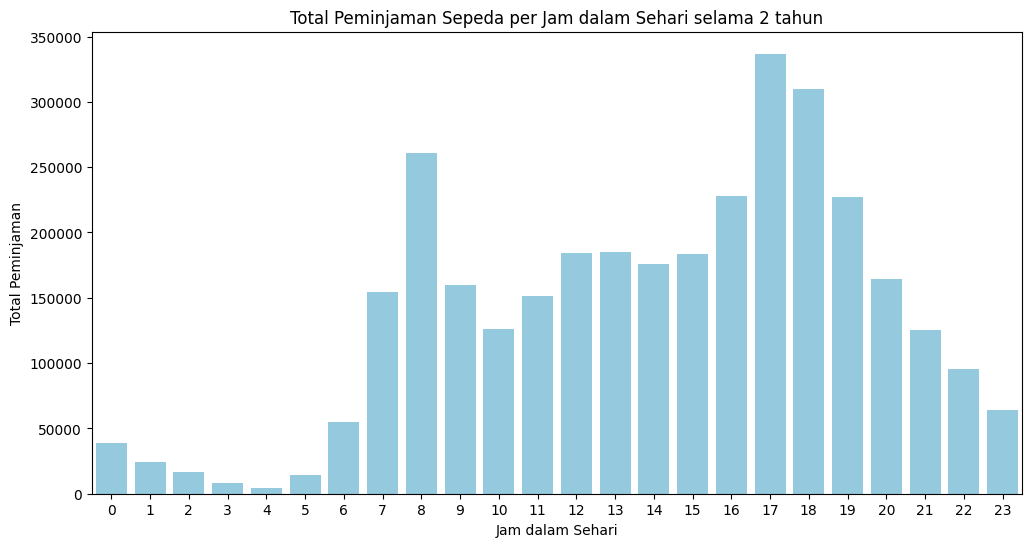

In [24]:
# Menghitung total peminjaman sepeda untuk setiap jam
total_counts_per_hour = hour_df.groupby('hr')['cnt'].sum()

# Menampilkan jam dengan total peminjaman tertinggi
most_used_hour = total_counts_per_hour.idxmax()

print(f"Jam dengan Peminjaman Sepeda Tertinggi: {most_used_hour}")

# Membuat Bar Chart tanpa menggunakan 'palette' dan menyertakan 'legend=False'
plt.figure(figsize=(12, 6))
sns.barplot(x=total_counts_per_hour.index, y=total_counts_per_hour.values, color='skyblue')
plt.title('Total Peminjaman Sepeda per Jam dalam Sehari selama 2 tahun')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Peminjaman')
plt.show()

Apakah ada pola musiman atau tren jangka panjang?


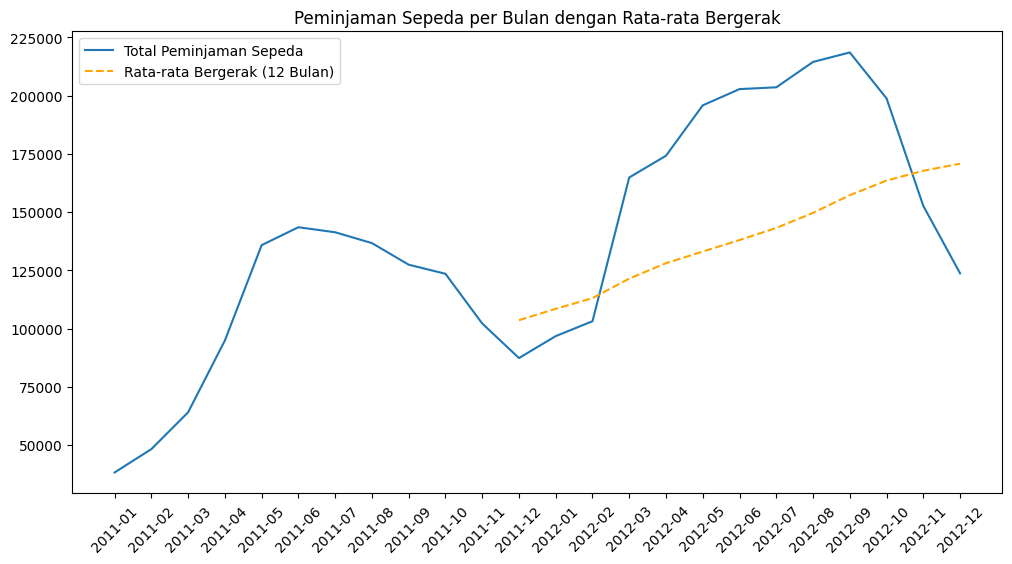

In [32]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Ekstraksi informasi waktu
hour_df['month'] = hour_df['dteday'].dt.to_period('M')  # Ekstraksi bulan

# Menghitung total peminjaman sepeda per bulan
monthly_counts = hour_df.groupby('month')['cnt'].sum()

# Plot time series data dengan rolling average
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, label='Total Peminjaman Sepeda')
plt.plot(monthly_counts.index.astype(str), monthly_counts.rolling(window=12).mean(), label='Rata-rata Bergerak (12 Bulan)', linestyle='--', color='orange')

plt.title('Peminjaman Sepeda per Bulan dengan Rata-rata Bergerak')
# plt.xlabel('Bulan')
# plt.ylabel('Total Peminjaman')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berubah sepanjang waktu?

Text(0, 0.5, 'Jumlah Peminjaman')

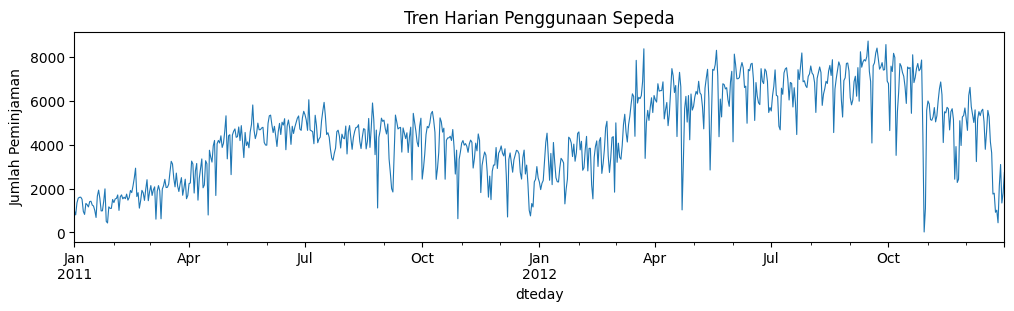

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
daily_counts = day_df.groupby('dteday')['cnt'].sum()
daily_counts.plot(linewidth=0.8)
plt.title('Tren Harian Penggunaan Sepeda')
# plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')

Text(0, 0.5, 'Jumlah Peminjaman')

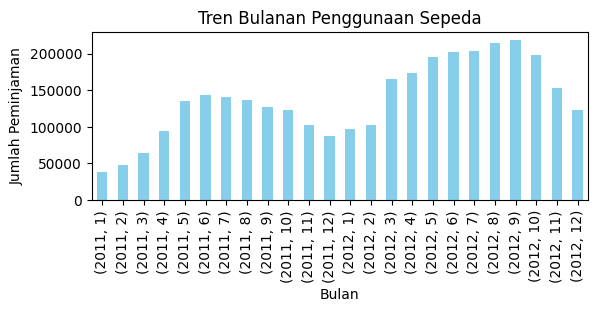

In [28]:
plt.subplot(2, 1, 2)
monthly_counts = day_df.groupby(['year', 'month'])['cnt'].sum()
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Tren Bulanan Penggunaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')

### Pertanyaan 2: Bagaimana pengaruh musim bekerja pada tren?

Musim dengan Peminjaman Sepeda Tertinggi: Musim Panas
Musim dengan Peminjaman Sepeda Terendah: Musim Dingin


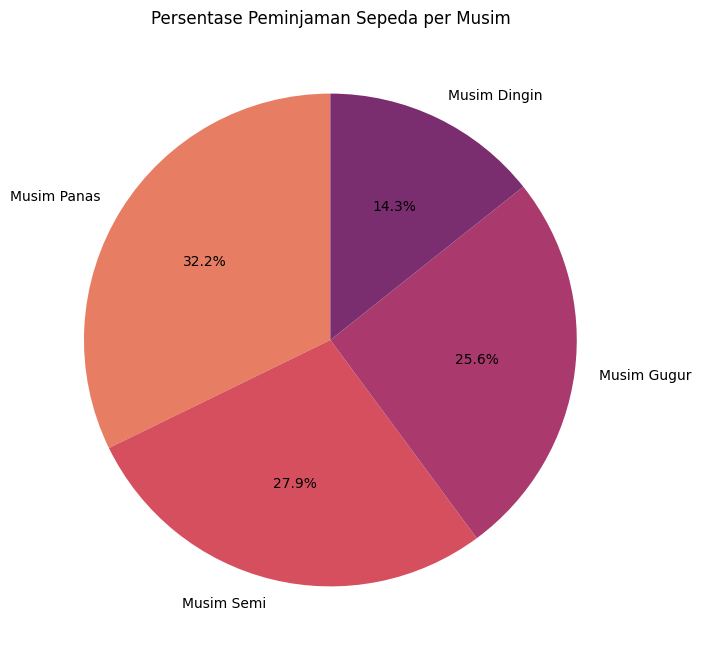

In [29]:
print(f"Musim dengan Peminjaman Sepeda Tertinggi: {most_used_season}")
print(f"Musim dengan Peminjaman Sepeda Terendah: {least_used_season}")

plt.figure(figsize=(8, 8))
plt.pie(total_counts_per_season, labels=total_counts_per_season.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('flare', len(total_counts_per_season)))
plt.title('Persentase Peminjaman Sepeda per Musim')
plt.show()

### Pertanyaan 3: Pada jam berapakah, org org lebih suka bersepeda?

Jam dengan Peminjaman Sepeda Tertinggi: 17


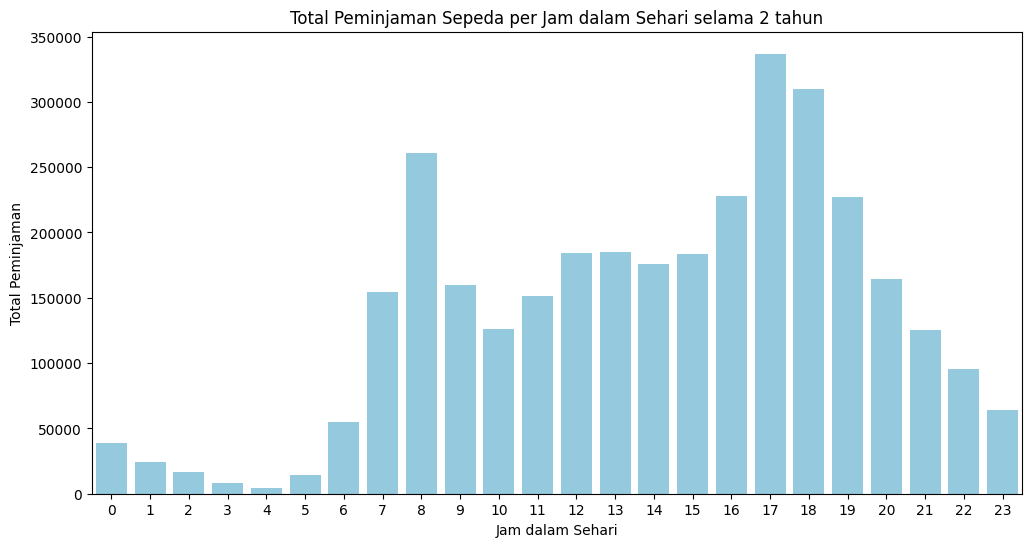

In [30]:
print(f"Jam dengan Peminjaman Sepeda Tertinggi: {most_used_hour}")

# Membuat Bar Chart tanpa menggunakan 'palette' dan menyertakan 'legend=False'
plt.figure(figsize=(12, 6))
sns.barplot(x=total_counts_per_hour.index, y=total_counts_per_hour.values, color='skyblue')
plt.title('Total Peminjaman Sepeda per Jam dalam Sehari selama 2 tahun')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Peminjaman')
plt.show()

#### Pertanyaan ke 4 : Apakah ada pola musiman atau tren jangka panjang?

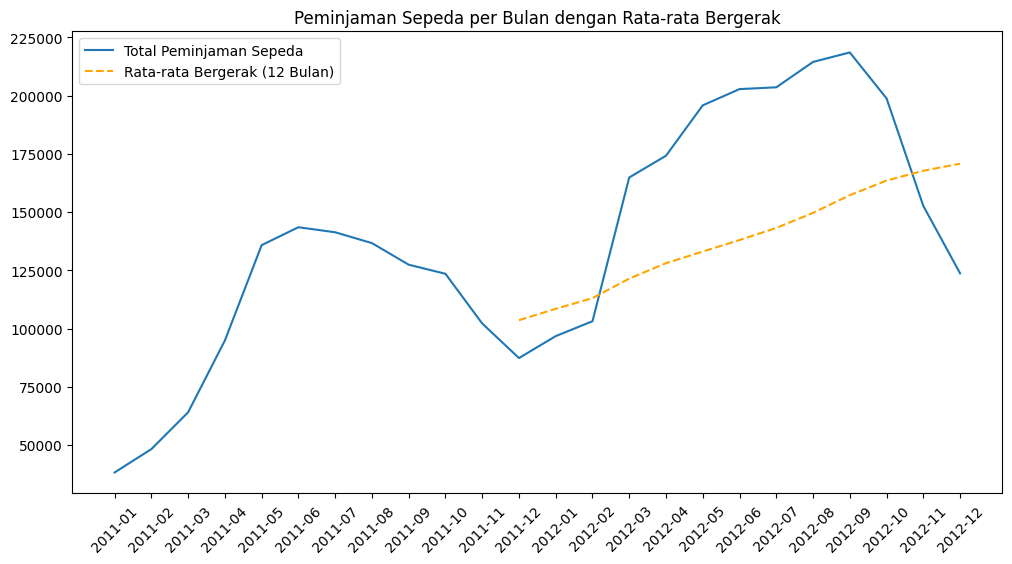

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, label='Total Peminjaman Sepeda')
plt.plot(monthly_counts.index.astype(str), monthly_counts.rolling(window=12).mean(), label='Rata-rata Bergerak (12 Bulan)', linestyle='--', color='orange')

plt.title('Peminjaman Sepeda per Bulan dengan Rata-rata Bergerak')
# plt.xlabel('Bulan')
# plt.ylabel('Total Peminjaman')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [34]:
day_df.to_csv("dataDay.csv", index=False)


In [ ]:
hour_df.to_csv("dataHour.csv", index=False)

- Conclution pertanyaan 1
- conclution pertanyaan 2